In [1]:
#pandas, para lectura de datos.
import pandas as pd 

#numpy,  carga de datos en memoria
import numpy as np

#matplotlib, para graficar.
import matplotlib.pyplot as plt 

#Sequential es fundamental para apilar capas que pueden conformar una red neuronal o simplemente una función matématica.   
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

# Pre-procesamiento de datos
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Función para graficar resultados
#-------------------------------------------------------

def graficar_resultados(historia):
	plt.subplot(1,2,1)
	plt.plot(historia.history['loss'])
	plt.plot(historia.history['val_loss'])
	plt.ylabel('Pérdida')
	plt.xlabel('Iteración')
	plt.legend(['Entrenamiento','Validación'])

	plt.subplot(1,2,2)
	plt.plot(historia.history['accuracy'])
	plt.plot(historia.history['val_accuracy'])
	plt.ylabel('Precisión')
	plt.xlabel('Iteración')
	plt.legend(['Entrenamiento','Validación'])

	ax = plt.gca()
	ax.yaxis.set_label_position("right")
	ax.yaxis.tick_right()

	plt.show()

In [3]:
# Lectura y pre-procesamiento de datos
#-------------------------------------------------------

# El set de datos consta de 768 registros y 8 variables concernientes a la propension a la diabetes
# de un grupo de pacientes, con una variable objetivo, ubicada al final, indicando si presenta la
# enfermedad: 1 o, si es una persona sana: 0.

dataset = np.loadtxt("dataset.csv", delimiter=",")
X = dataset[:, 0:8]
Y = dataset[:, 8]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Segmentacion de los datos en: Datos de entrenamientos y de validacion.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
# Creación, entrenamiento y validación de los modelos a contrastar.
#-------------------------------------------------------
np.random.seed(100)

# Modelo de base: 2 capas ocultas con 1000 y 250 neuronas
#-------------------------------------------------------

#Creación del modelo con: Sequential(), donde se indican las dimensiones de la red neuronal.
model = Sequential()
model.add(Dense(1000, input_dim=8, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
historia = model.fit(x_train, y_train, batch_size=64, epochs=150, validation_data=(x_test,y_test), verbose=1)



Epoch 1/150
10/10 [==============================] - 0s 16ms/step - loss: 0.5555 - accuracy: 0.6840 - val_loss: 0.5233 - val_accuracy: 0.7597
Epoch 2/150
10/10 [==============================] - 0s 5ms/step - loss: 0.4589 - accuracy: 0.7687 - val_loss: 0.5297 - val_accuracy: 0.7597
Epoch 3/150
10/10 [==============================] - 0s 4ms/step - loss: 0.4358 - accuracy: 0.7883 - val_loss: 0.5379 - val_accuracy: 0.7468
Epoch 4/150
10/10 [==============================] - 0s 4ms/step - loss: 0.4240 - accuracy: 0.7866 - val_loss: 0.5419 - val_accuracy: 0.7468
Epoch 5/150
10/10 [==============================] - 0s 5ms/step - loss: 0.4152 - accuracy: 0.7932 - val_loss: 0.5430 - val_accuracy: 0.7662
Epoch 6/150
10/10 [==============================] - 0s 4ms/step - loss: 0.4133 - accuracy: 0.8094 - val_loss: 0.5519 - val_accuracy: 0.7468
Epoch 7/150
10/10 [==============================] - 0s 5ms/step - loss: 0.3974 - accuracy: 0.8111 - val_loss: 0.5432 - val_accuracy: 0.7468
Epoch 8/150


Epoch 59/150
10/10 [==============================] - 0s 4ms/step - loss: 0.1158 - accuracy: 0.9707 - val_loss: 1.0439 - val_accuracy: 0.6883
Epoch 60/150
10/10 [==============================] - 0s 4ms/step - loss: 0.1050 - accuracy: 0.9853 - val_loss: 1.0451 - val_accuracy: 0.7273
Epoch 61/150
10/10 [==============================] - 0s 4ms/step - loss: 0.1059 - accuracy: 0.9788 - val_loss: 1.0835 - val_accuracy: 0.6948
Epoch 62/150
10/10 [==============================] - 0s 4ms/step - loss: 0.1084 - accuracy: 0.9691 - val_loss: 1.0676 - val_accuracy: 0.6883
Epoch 63/150
10/10 [==============================] - 0s 4ms/step - loss: 0.1075 - accuracy: 0.9723 - val_loss: 1.0965 - val_accuracy: 0.7013
Epoch 64/150
10/10 [==============================] - 0s 4ms/step - loss: 0.1120 - accuracy: 0.9658 - val_loss: 1.1423 - val_accuracy: 0.7338
Epoch 65/150
10/10 [==============================] - 0s 4ms/step - loss: 0.1033 - accuracy: 0.9658 - val_loss: 1.1377 - val_accuracy: 0.6753
Epoch 

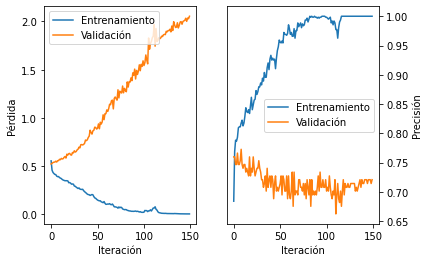

In [5]:
graficar_resultados(historia)

#En el grafico de la iquierda:
# A medida que suceden las iteraciones (epochs), la perdida(loss) en el set de entrenamiento disminuye, 
# mientras, que en el set de validacion aumenta drasticamente, por consiguiente, existe overffifting.

#En el grafico de la derecha:
# A medida que suceden las iteraciones (epochs), la precision en el set de entrenamiento aumenta,
# mientras que en el set de validacion disminuye, por consiguiente,
# se reafirma que: Existe overffifting.

In [6]:
# Modelo simplificado 1 (modelo base) : 1 capa oculta con 100 neuronas
#-------------------------------------------------------

model = Sequential()
model.add(Dense(100, input_dim=8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
historia = model.fit(x_train, y_train, batch_size=64, epochs=150, validation_data=(x_test,y_test), verbose=1)

Epoch 1/150
10/10 [==============================] - 0s 11ms/step - loss: 0.7465 - accuracy: 0.3713 - val_loss: 0.6946 - val_accuracy: 0.5065
Epoch 2/150
10/10 [==============================] - 0s 2ms/step - loss: 0.6729 - accuracy: 0.5717 - val_loss: 0.6435 - val_accuracy: 0.6299
Epoch 3/150
10/10 [==============================] - 0s 2ms/step - loss: 0.6202 - accuracy: 0.7345 - val_loss: 0.6064 - val_accuracy: 0.7078
Epoch 4/150
10/10 [==============================] - 0s 3ms/step - loss: 0.5809 - accuracy: 0.7557 - val_loss: 0.5791 - val_accuracy: 0.7597
Epoch 5/150
10/10 [==============================] - 0s 2ms/step - loss: 0.5505 - accuracy: 0.7671 - val_loss: 0.5591 - val_accuracy: 0.7468
Epoch 6/150
10/10 [==============================] - 0s 2ms/step - loss: 0.5290 - accuracy: 0.7687 - val_loss: 0.5447 - val_accuracy: 0.7597
Epoch 7/150
10/10 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.7671 - val_loss: 0.5357 - val_accuracy: 0.7532
Epoch 8/150


Epoch 59/150
10/10 [==============================] - 0s 2ms/step - loss: 0.4055 - accuracy: 0.8013 - val_loss: 0.5503 - val_accuracy: 0.7597
Epoch 60/150
10/10 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.7980 - val_loss: 0.5525 - val_accuracy: 0.7468
Epoch 61/150
10/10 [==============================] - 0s 2ms/step - loss: 0.4043 - accuracy: 0.7997 - val_loss: 0.5519 - val_accuracy: 0.7468
Epoch 62/150
10/10 [==============================] - 0s 2ms/step - loss: 0.4033 - accuracy: 0.8029 - val_loss: 0.5530 - val_accuracy: 0.7468
Epoch 63/150
10/10 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.7997 - val_loss: 0.5540 - val_accuracy: 0.7468
Epoch 64/150
10/10 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.7997 - val_loss: 0.5553 - val_accuracy: 0.7468
Epoch 65/150
10/10 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8013 - val_loss: 0.5540 - val_accuracy: 0.7468
Epoch 

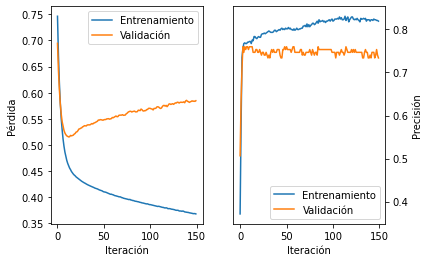

In [7]:
graficar_resultados(historia)

#En el grafico de la iquierda:
# A medida que suceden las iteraciones (epochs), la perdida(loss) en el set de entrenamiento disminuye, 
# mientras, que en el set de validacion disminuye hasta mas o menos la iteracion numero 10, para luego
# aumentar, por consiguiente, todavia sigue habiendo overffifting.

#En el grafico de la derecha:
# A medida que suceden las iteraciones (epochs), la precision en el set de entrenamiento aumenta,
# mientras que en el set de validacion tambien aumenta, estabilizandoce alrededor del 73 %,
# aunque siguien existiendo overffifting, es el mejor modelo hasta los momentos.

In [8]:
# Modelo 2 (modelo base) con dropout
#-------------------------------------------------------

model = Sequential()
model.add(Dense(1000, input_dim=8, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
historia = model.fit(x_train, y_train, batch_size=64, epochs=150, validation_data=(x_test,y_test), verbose=1)

Epoch 1/150
10/10 [==============================] - 0s 14ms/step - loss: 0.6882 - accuracy: 0.6189 - val_loss: 0.5987 - val_accuracy: 0.6623
Epoch 2/150
10/10 [==============================] - 0s 5ms/step - loss: 0.6395 - accuracy: 0.6824 - val_loss: 0.5570 - val_accuracy: 0.7208
Epoch 3/150
10/10 [==============================] - 0s 6ms/step - loss: 0.5724 - accuracy: 0.7264 - val_loss: 0.5307 - val_accuracy: 0.7597
Epoch 4/150
10/10 [==============================] - 0s 6ms/step - loss: 0.5338 - accuracy: 0.7410 - val_loss: 0.5192 - val_accuracy: 0.7532
Epoch 5/150
10/10 [==============================] - 0s 6ms/step - loss: 0.5529 - accuracy: 0.7085 - val_loss: 0.5102 - val_accuracy: 0.7597
Epoch 6/150
10/10 [==============================] - 0s 6ms/step - loss: 0.5452 - accuracy: 0.7427 - val_loss: 0.5055 - val_accuracy: 0.7662
Epoch 7/150
10/10 [==============================] - 0s 5ms/step - loss: 0.5093 - accuracy: 0.7590 - val_loss: 0.5023 - val_accuracy: 0.7662
Epoch 8/150


Epoch 116/150
10/10 [==============================] - 0s 5ms/step - loss: 0.4355 - accuracy: 0.7899 - val_loss: 0.5328 - val_accuracy: 0.7662
Epoch 117/150
10/10 [==============================] - 0s 5ms/step - loss: 0.4278 - accuracy: 0.7997 - val_loss: 0.5338 - val_accuracy: 0.7662
Epoch 118/150
10/10 [==============================] - 0s 5ms/step - loss: 0.4465 - accuracy: 0.8062 - val_loss: 0.5347 - val_accuracy: 0.7662
Epoch 119/150
10/10 [==============================] - 0s 5ms/step - loss: 0.4222 - accuracy: 0.8013 - val_loss: 0.5367 - val_accuracy: 0.7662
Epoch 120/150
10/10 [==============================] - 0s 5ms/step - loss: 0.4409 - accuracy: 0.8160 - val_loss: 0.5366 - val_accuracy: 0.7662
Epoch 121/150
10/10 [==============================] - 0s 5ms/step - loss: 0.4228 - accuracy: 0.7850 - val_loss: 0.5366 - val_accuracy: 0.7662
Epoch 122/150
10/10 [==============================] - 0s 5ms/step - loss: 0.4482 - accuracy: 0.8029 - val_loss: 0.5348 - val_accuracy: 0.7662

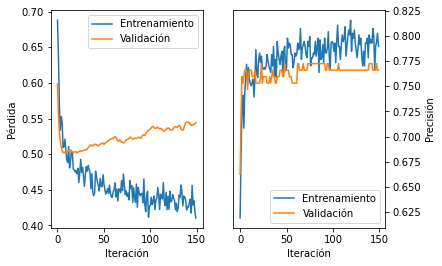

In [9]:
graficar_resultados(historia)

#En el grafico de la iquierda:
# A medida que suceden las iteraciones (epochs), la perdida(loss) en el set de entrenamiento disminuye, 
# mientras, que en el set de validacion disminuye hasta mas o menos la iteracion numero 10, para luego
# aumentar, por consiguiente, todavia sigue habiendo overffifting.

#En el grafico de la derecha:
# A medida que suceden las iteraciones (epochs), la precision en el set de entrenamiento aumenta,
# mientras que en el set de validacion tambien aumenta, estabilizandoce alrededor del 77 %,
# mucho más cercano a la precision del 79%, en el set de entrenamiento. 

In [10]:
# Modelo con droput y early stopping 3 (modelo base)
model = Sequential()
model.add(Dense(1000, input_dim=8, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
# monitor='val_loss', indica en que set de datos sera seleecionado para detener el algoritmo.
# patience=4, al hallar el punto minimo, el algoritmo seguira 4 iteraciones más en busca de un
# nuevo valor minimo, sino lo consigue, se detiene y toma con la variable: restore_best_weights=True,
# los valores de los parametros del lugar donde se halló el punto mínimo.


historia = model.fit(x_train, y_train, batch_size=64, epochs=150, validation_data=(x_test,y_test), verbose=1, callbacks=[early_stop])


Epoch 1/150
10/10 [==============================] - 0s 14ms/step - loss: 0.6890 - accuracy: 0.6156 - val_loss: 0.5969 - val_accuracy: 0.6558
Epoch 2/150
10/10 [==============================] - 0s 6ms/step - loss: 0.6084 - accuracy: 0.6938 - val_loss: 0.5513 - val_accuracy: 0.7468
Epoch 3/150
10/10 [==============================] - 0s 5ms/step - loss: 0.6032 - accuracy: 0.6873 - val_loss: 0.5309 - val_accuracy: 0.7403
Epoch 4/150
10/10 [==============================] - 0s 5ms/step - loss: 0.5447 - accuracy: 0.7248 - val_loss: 0.5244 - val_accuracy: 0.7208
Epoch 5/150
10/10 [==============================] - 0s 5ms/step - loss: 0.5599 - accuracy: 0.7101 - val_loss: 0.5195 - val_accuracy: 0.7338
Epoch 6/150
10/10 [==============================] - 0s 6ms/step - loss: 0.5384 - accuracy: 0.7459 - val_loss: 0.5194 - val_accuracy: 0.7273
Epoch 7/150
10/10 [==============================] - 0s 5ms/step - loss: 0.5245 - accuracy: 0.7557 - val_loss: 0.5184 - val_accuracy: 0.7208
Epoch 8/150


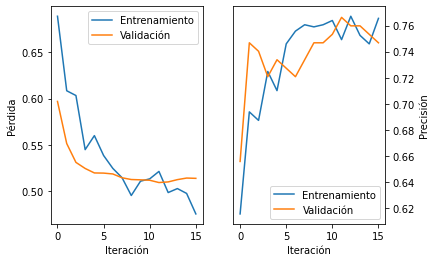

In [11]:
graficar_resultados(historia)

#En el grafico de la iquierda:
# A medida que suceden las iteraciones (epochs), la perdida(loss) en el set de entrenamiento disminuye, 
# mientras, que en el set de validacion disminuye hasta donde se alcanza el punto minimo de la iteracion.


#En el grafico de la derecha:
# A medida que suceden las iteraciones (epochs), la precision en el set de entrenamiento aumenta,
# mientras que en el set de validacion aumenta, hasta que se halla el punto minimo del error en
# el set de validacion, para finiquitar la ejecución del algoritmo.

In [ ]:
# El Modelo 2 (modelo base) con dropout fue el que resulto más optimo, tanto en el set de pruebas
# como en el de validación, por eso, se recomienda su ejecución.